In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
from matplotlib import pyplot

import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf
%matplotlib inline


# Problem Statement:
The goal of this project is to build a predictive model to classify loan applicants as likely to default or not default. By analyzing historical data on customer demographics, loan features, and past repayment behaviors, the model aims to accurately identify high-risk applicants who are more likely to default on their loans.

In [9]:
crd=pd.read_csv("C:\\Users\\megha\\OneDrive\\Desktop\\Practice\\Credit_risk1.csv")

In [10]:
crd.head()

,person_age,gender,marital_status,income,no.of_dependents,person_emp_length,employment_stability,person_home_ownership,home_value,loan_intent,...,debt-asset_ratio,debt-income_ratio,tax,no.of _credit _cards,creditcard_usage%,cb_person_default_on_file,c_ length,defaulted_90d,defaulted_180d,defaulted_365d
0,22,Male,Un-Married,59000,4,1.0,1,RENT,-,PERSONAL,...,0.55%,59.00%,10,2,17,Y,3,N,N,Y
1,21,Male,Un-Married,9600,6,5.0,2,OWN,6373043,EDUCATION,...,0.01%,10.00%,5,2,24,N,2,Non-def,Non-def,Non-def
2,25,Male,Married,9600,3,1.0,1,MORTGAGE,6076510,MEDICAL,...,0.07%,57.00%,5,3,62,N,3,Non-def,Non-def,Non-def
3,23,Male,Un-Married,65500,5,4.0,2,RENT,-,MEDICAL,...,0.70%,53.00%,10,2,56,N,2,Non-def,Non-def,Non-def
4,24,Male,Un-Married,54400,0,8.0,3,RENT,-,MEDICAL,...,0.94%,55.00%,10,3,28,Y,4,N,N,Y


In [11]:
crd.describe()

,person_age,income,no.of_dependents,person_emp_length,employment_stability,loan_amnt,loan_int_rate,loan_status,assets_worth,tax,no.of _credit _cards,creditcard_usage%,c_ length
count,32581.000000,3.258100e+04,32581.000000,31686.000000,32581.000000,32581.000000,29465.000000,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,3.024953,4.785836,2.111230,9589.371106,11.011695,0.218164,4.993284e+06,10.088456,1.487554,35.094043,5.804211
std,6.348078,6.198312e+04,2.004589,4.089108,0.764725,6322.086646,3.240459,0.413006,2.316639e+06,3.467684,1.116292,20.431595,4.055001
min,20.000000,4.000000e+03,0.000000,0.000000,1.000000,500.000000,5.420000,0.000000,1.000456e+06,5.000000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,1.000000,2.000000,2.000000,5000.000000,7.900000,0.000000,2.977399e+06,7.000000,0.000000,17.000000,3.000000
50%,26.000000,5.500000e+04,3.000000,4.000000,2.000000,8000.000000,10.990000,0.000000,4.988508e+06,10.000000,1.000000,35.000000,4.000000
75%,30.000000,7.920000e+04,5.000000,7.000000,3.000000,12200.000000,13.470000,0.000000,7.000586e+06,15.000000,2.000000,53.000000,8.000000
max,144.000000,6.000000e+06,6.000000,123.000000,3.000000,35000.000000,23.220000,1.000000,8.999652e+06,15.000000,3.000000,70.000000,30.000000


In [12]:
crd.describe(include='object').T

,count,unique,top,freq
gender,32581,2,Female,16397
marital_status,32581,2,Married,20266
person_home_ownership,32581,4,RENT,16446
home_value,32581,16003,-,16553
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
debt-asset_ratio,32581,245,0.08%,1257
debt-income_ratio,32581,77,10.00%,1533
cb_person_default_on_file,32581,2,N,26836
defaulted_90d,32581,3,Non-def,26836


In [13]:
crd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   person_age                 32581 non-null  int64  
 1   gender                     32581 non-null  object 
 2   marital_status             32581 non-null  object 
 3   income                     32581 non-null  int64  
 4   no.of_dependents           32581 non-null  int64  
 5   person_emp_length          31686 non-null  float64
 6   employment_stability       32581 non-null  int64  
 7   person_home_ownership      32581 non-null  object 
 8   home_value                 32581 non-null  object 
 9   loan_intent                32581 non-null  object 
 10  loan_grade                 32581 non-null  object 
 11  loan_amnt                  32581 non-null  int64  
 12  loan_int_rate              29465 non-null  float64
 13  loan_status                32581 non-null  int

In [14]:
crd.shape

(32581, 25)

In [15]:
crd.dtypes

person_age                     int64
gender                        object
marital_status                object
income                         int64
no.of_dependents               int64
person_emp_length            float64
employment_stability           int64
person_home_ownership         object
home_value                    object
loan_intent                   object
loan_grade                    object
loan_amnt                      int64
loan_int_rate                float64
loan_status                    int64
assets_worth                   int64
debt-asset_ratio              object
debt-income_ratio             object
tax                            int64
no.of _credit _cards           int64
creditcard_usage%              int64
cb_person_default_on_file     object
c_ length                      int64
defaulted_90d                 object
defaulted_180d                object
defaulted_365d                object
dtype: object

# Finding the categorical datatypes and Numerical datatypes

In [16]:
object_columns = crd.select_dtypes(include=['object']).columns
print(object_columns)

Index(['gender', 'marital_status', 'person_home_ownership', 'home_value',
       'loan_intent', 'loan_grade', 'debt-asset_ratio', 'debt-income_ratio',
       'cb_person_default_on_file', 'defaulted_90d', 'defaulted_180d',
       'defaulted_365d'],
      dtype='object')


In [17]:
for col in object_columns:
    d_type = crd[col].dtype

    counts =crd[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

Counts for gender:
gender
Female    16397
Male      16184
Name: count, dtype: int64
Counts for marital_status:
marital_status
Married       20266
Un-Married    12315
Name: count, dtype: int64
Counts for person_home_ownership:
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
Counts for home_value:
home_value
-          16553
9604858        2
8476873        2
9552909        2
6691560        2
           ...  
8253852        1
9926540        1
9497746        1
6441652        1
7937902        1
Name: count, Length: 16003, dtype: int64
Counts for loan_intent:
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
Counts for loan_grade:
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
Counts for debt-asset_ratio:
debt-ass

In [18]:
numeric_columns=crd.select_dtypes(include=['int64','float64']).columns
print(numeric_columns)

Index(['person_age', 'income', 'no.of_dependents', 'person_emp_length',
       'employment_stability', 'loan_amnt', 'loan_int_rate', 'loan_status',
       'assets_worth', 'tax', 'no.of _credit _cards', 'creditcard_usage%',
       'c_ length'],
      dtype='object')


# Dealing with Null Values

In [19]:
crd.isnull().sum()

person_age                      0
gender                          0
marital_status                  0
income                          0
no.of_dependents                0
person_emp_length             895
employment_stability            0
person_home_ownership           0
home_value                      0
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                3116
loan_status                     0
assets_worth                    0
debt-asset_ratio                0
debt-income_ratio               0
tax                             0
no.of _credit _cards            0
creditcard_usage%               0
cb_person_default_on_file       0
c_ length                       0
defaulted_90d                   0
defaulted_180d                  0
defaulted_365d                  0
dtype: int64

In [20]:
missing_columns = [col for col in crd.columns if crd[col].isnull().sum() > 0]
crd[missing_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   person_emp_length  31686 non-null  float64
 1   loan_int_rate      29465 non-null  float64
dtypes: float64(2)
memory usage: 509.2 KB


MEDIAN IS THE IDEAL FIX FOR MISSING VALUES WITHOUT EFFECT OF OUTLIERS.

In [21]:
def fill_numerical(crd):
    num_cols = crd.select_dtypes(include=['number']).columns
    for col in num_cols:
        crd[col] = crd[col].fillna(crd[col].median())
    return crd

In [22]:
crd=fill_numerical(crd)

In [23]:
missing_columns = [col for col in crd.columns if crd[col].isnull().sum() > 0]
crd[missing_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Empty DataFrame


But we can see in head function output the home value for the people who are not having home is '-' so we will remove this column

In [24]:
crd.drop("home_value",axis=1,inplace=True)

In [25]:
crd.columns

Index(['person_age', 'gender', 'marital_status', 'income', 'no.of_dependents',
       'person_emp_length', 'employment_stability', 'person_home_ownership',
       'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'assets_worth', 'debt-asset_ratio', 'debt-income_ratio',
       'tax', 'no.of _credit _cards', 'creditcard_usage%',
       'cb_person_default_on_file', 'c_ length', 'defaulted_90d',
       'defaulted_180d', 'defaulted_365d'],
      dtype='object')

# Dealing with Duplicates

In [26]:
crd.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 32581, dtype: bool

In [27]:
crd[crd.duplicated]

,person_age,gender,marital_status,income,no.of_dependents,person_emp_length,employment_stability,person_home_ownership,loan_intent,loan_grade,...,debt-asset_ratio,debt-income_ratio,tax,no.of _credit _cards,creditcard_usage%,cb_person_default_on_file,c_ length,defaulted_90d,defaulted_180d,defaulted_365d


# Exploratory Data Analysis

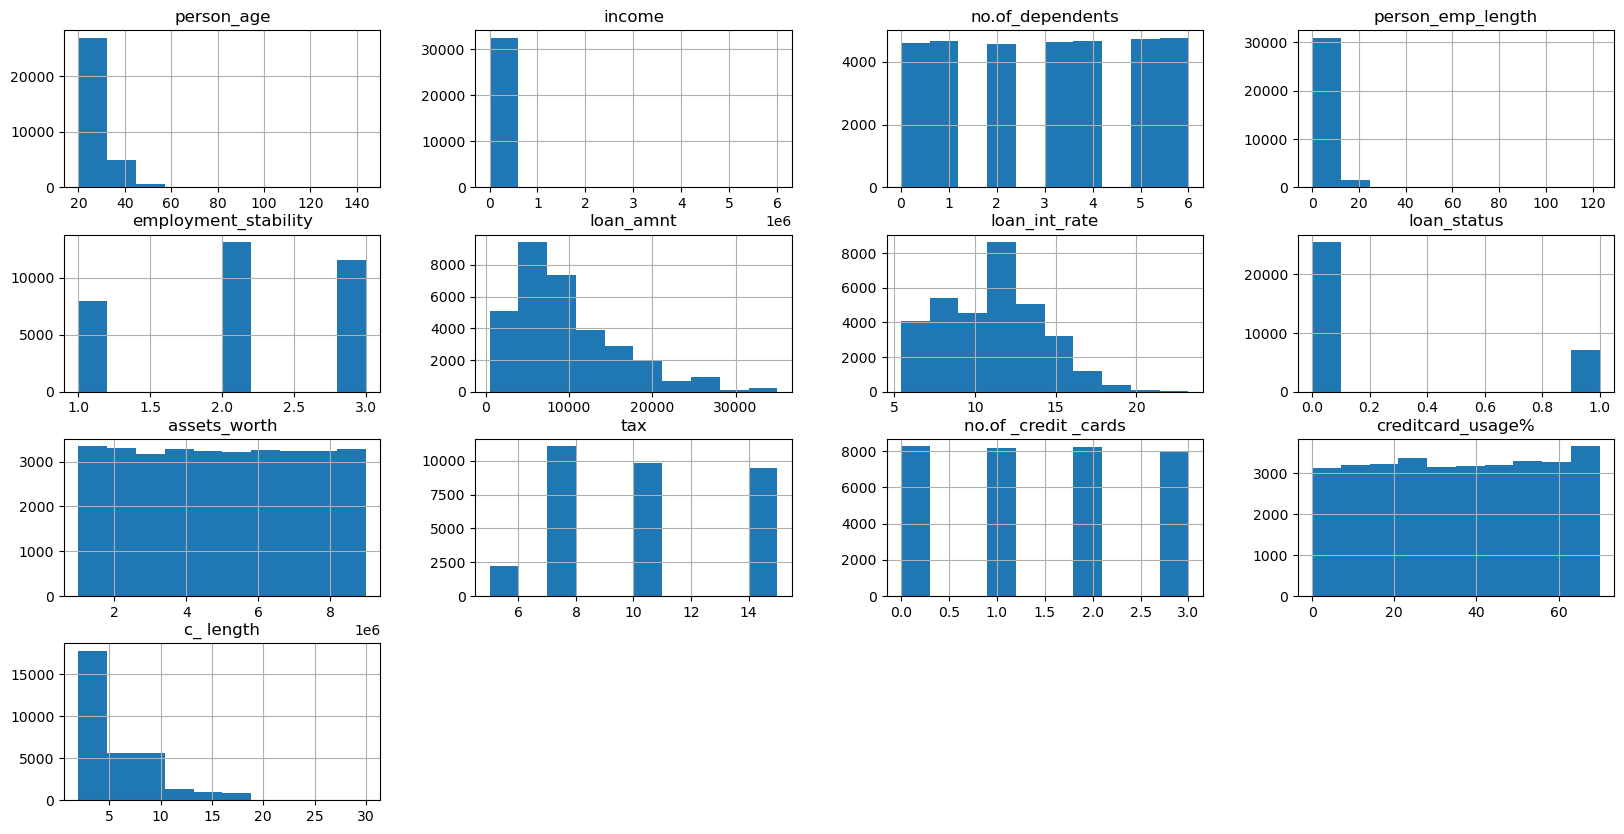

In [28]:
crd.hist(figsize=(20, 10))
plt.show()

Target Column for prediction

In [29]:
crd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   person_age                 32581 non-null  int64  
 1   gender                     32581 non-null  object 
 2   marital_status             32581 non-null  object 
 3   income                     32581 non-null  int64  
 4   no.of_dependents           32581 non-null  int64  
 5   person_emp_length          32581 non-null  float64
 6   employment_stability       32581 non-null  int64  
 7   person_home_ownership      32581 non-null  object 
 8   loan_intent                32581 non-null  object 
 9   loan_grade                 32581 non-null  object 
 10  loan_amnt                  32581 non-null  int64  
 11  loan_int_rate              32581 non-null  float64
 12  loan_status                32581 non-null  int64  
 13  assets_worth               32581 non-null  int

In [30]:
crd["loan_status"].unique()

array([1, 0], dtype=int64)

In [31]:
Z=crd['loan_status'].value_counts(normalize=True)

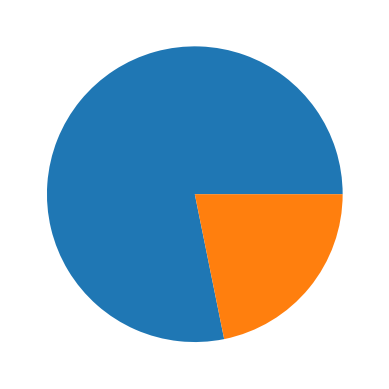

In [32]:
fig,ax=plt.subplots()
ax.pie(Z)
plt.show()

Plotting histograms to see the relation between each variable and Loan_status

In [33]:
num_col = crd.select_dtypes(include=['int64', 'float64']).columns.tolist()

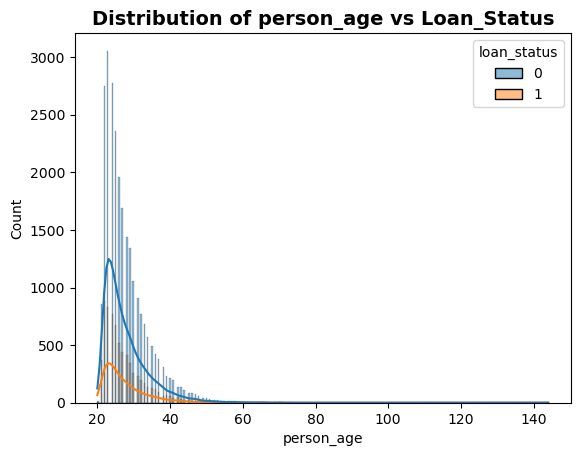

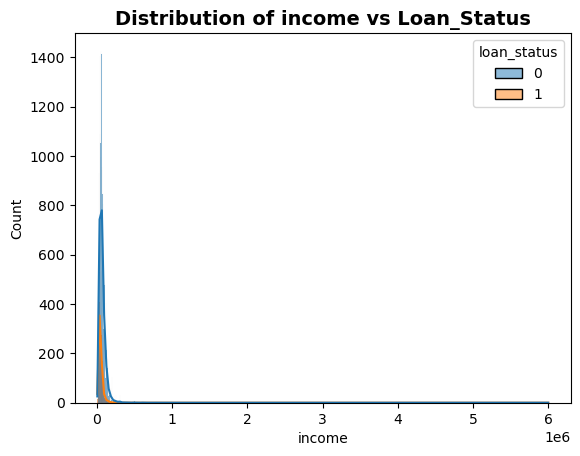

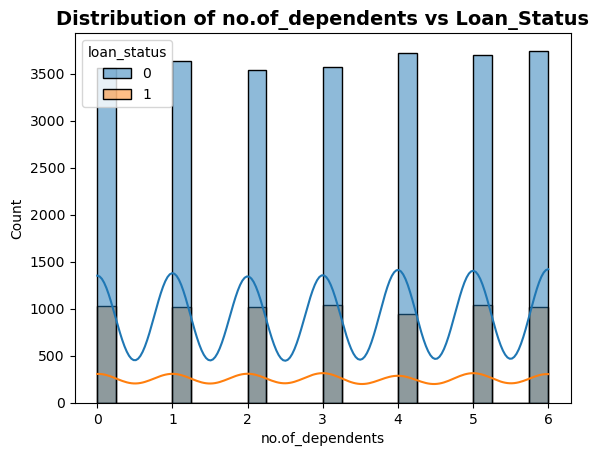

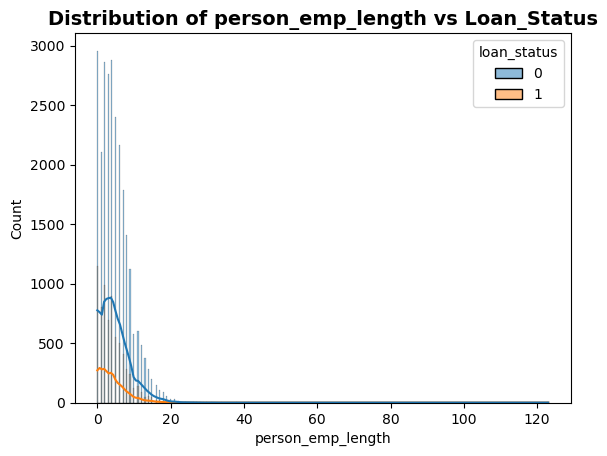

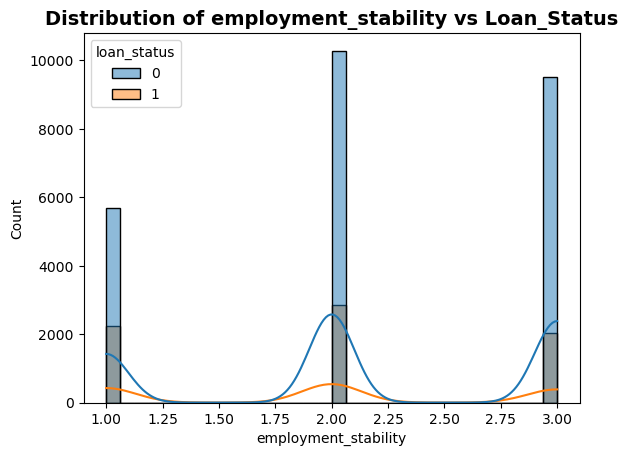

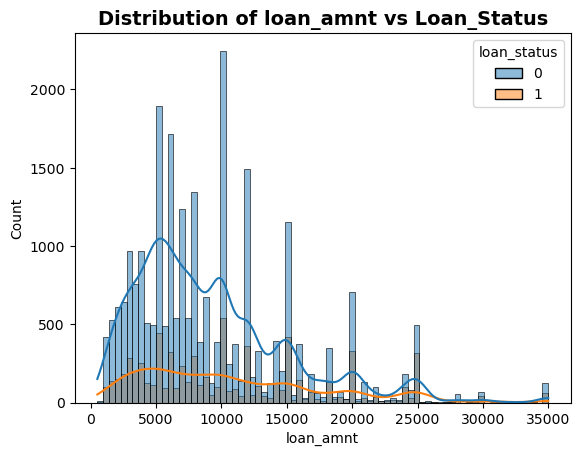

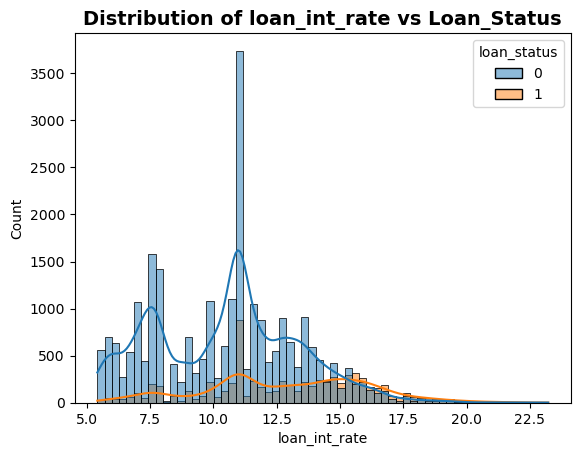

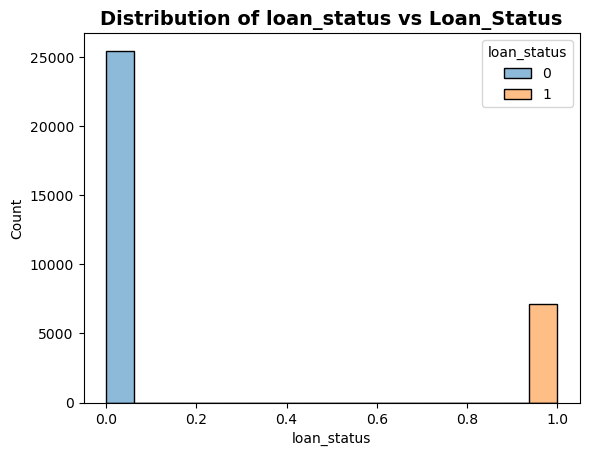

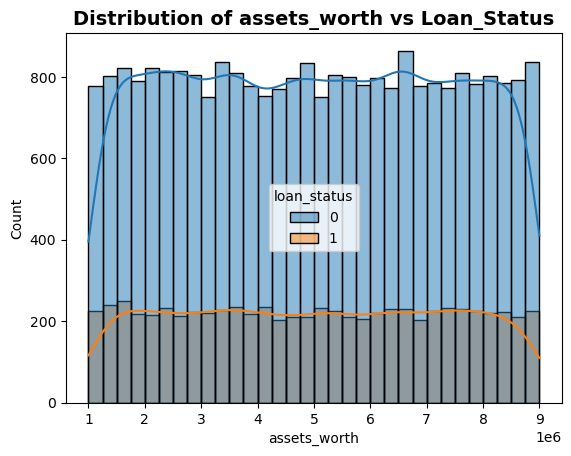

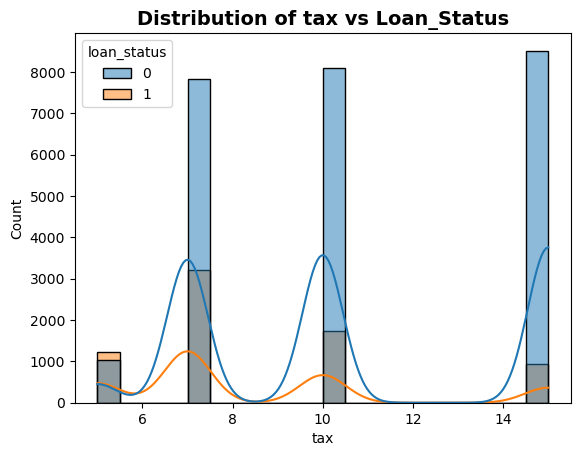

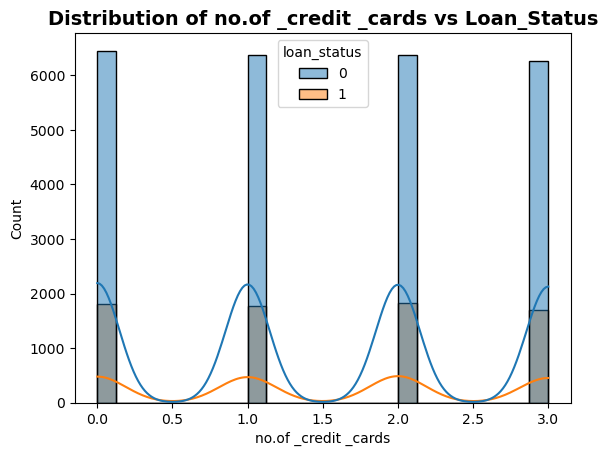

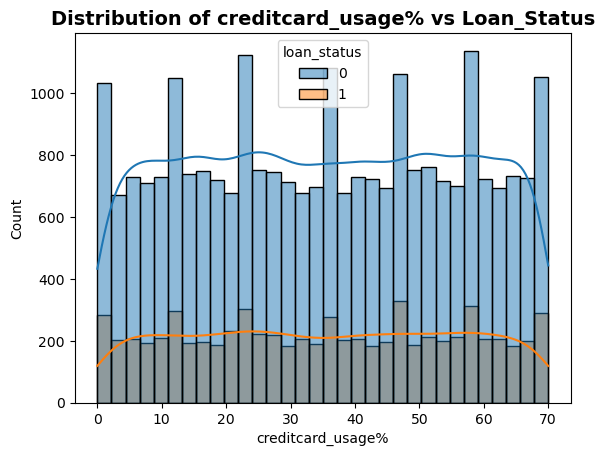

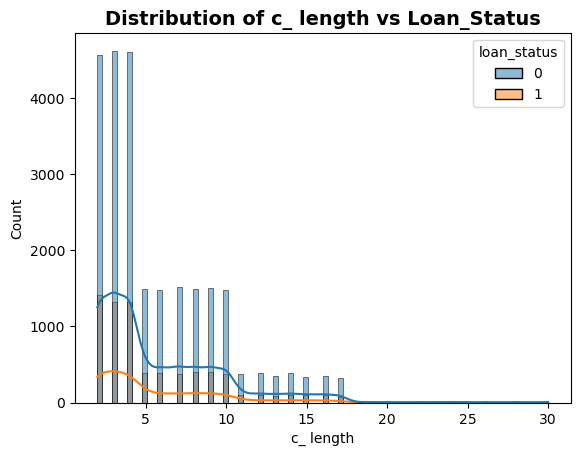

In [34]:
for col in num_col:
    sns.histplot(data=crd, x=col, hue='loan_status', kde=True)
    plt.title(f'Distribution of {col} vs Loan_Status', fontweight="bold", size=14)
    plt.show()
    print("\n")

In [35]:
cat_cols = crd.select_dtypes(include=['object']).columns.tolist()

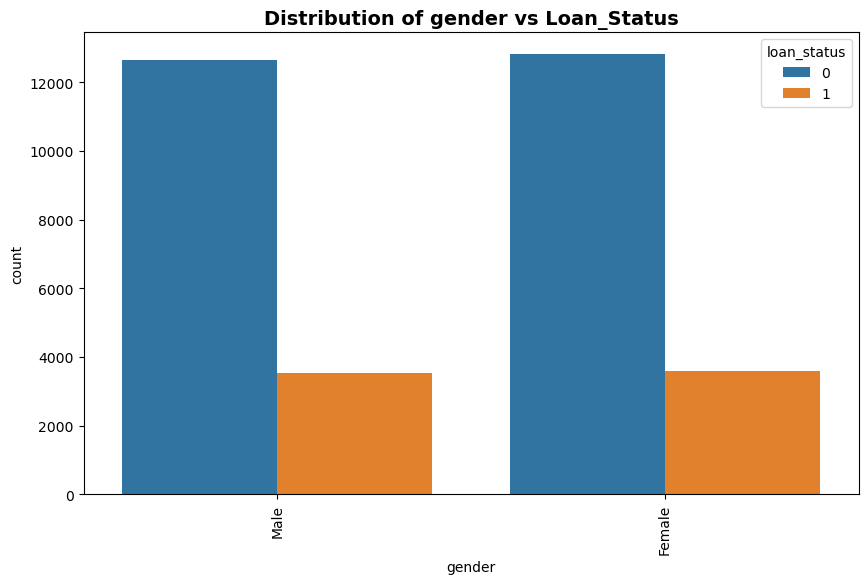

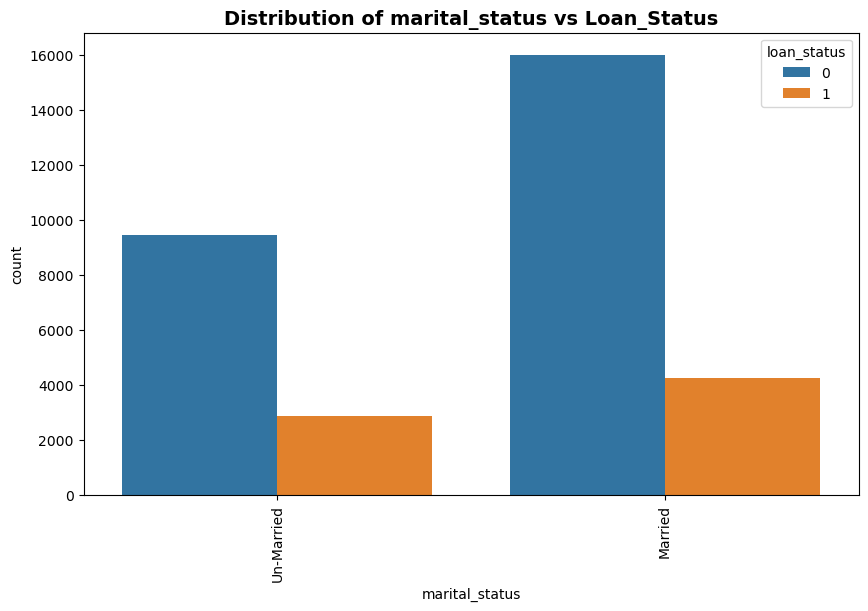

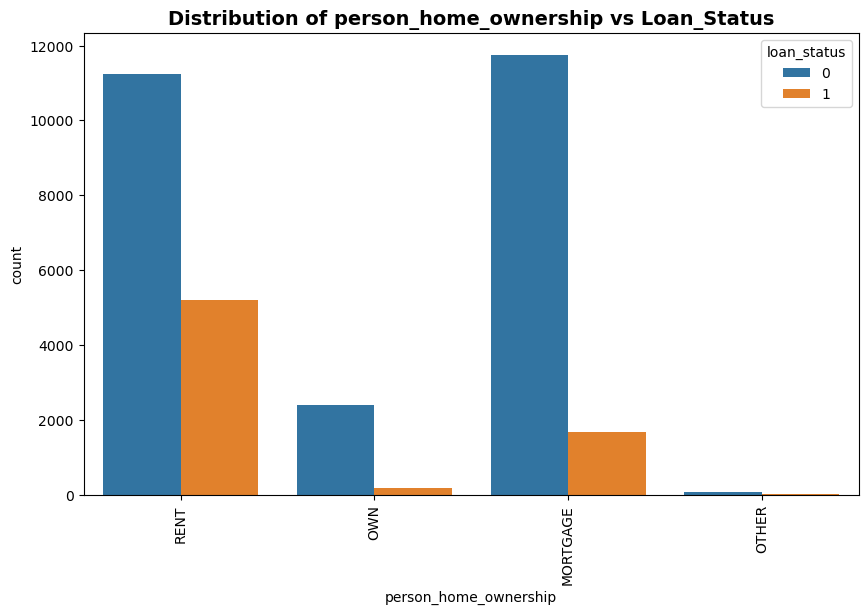

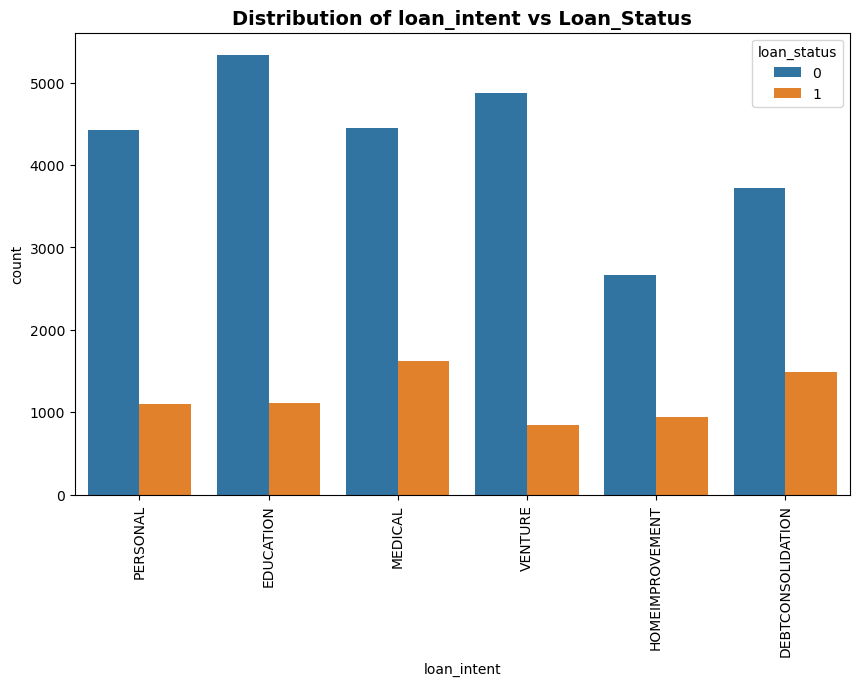

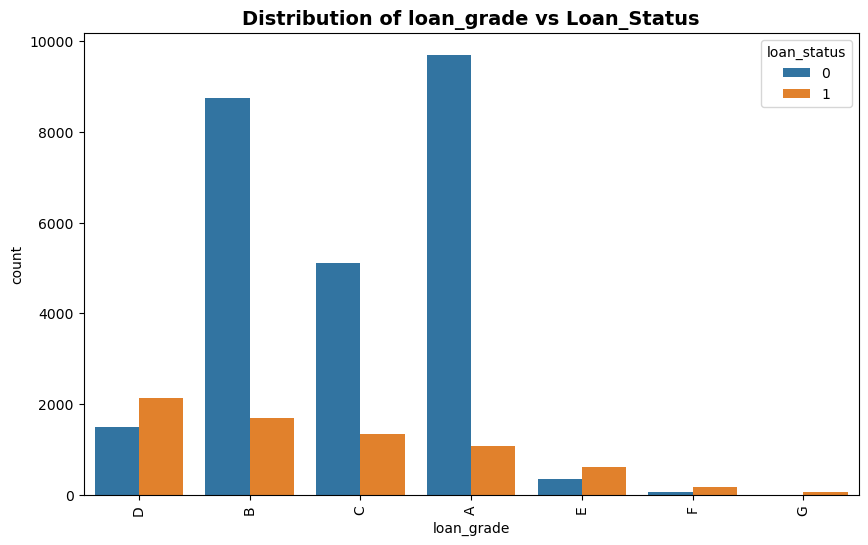

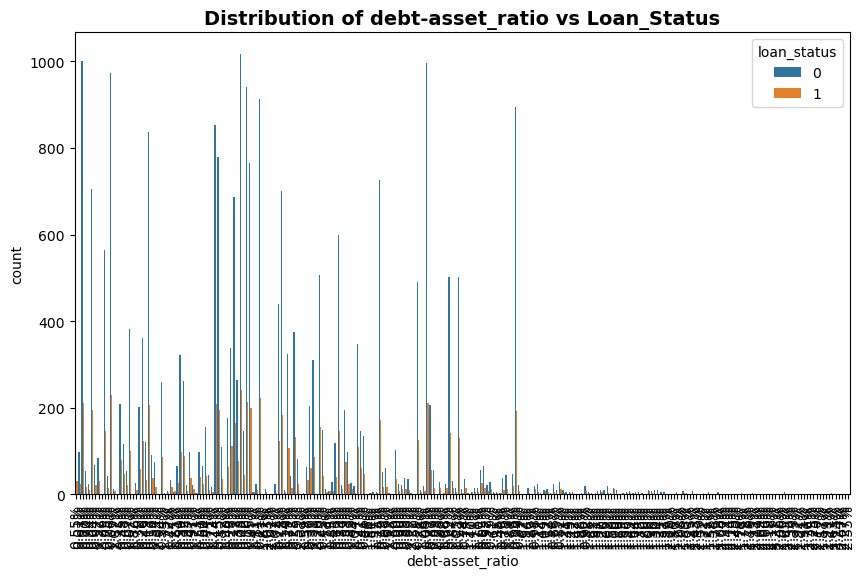

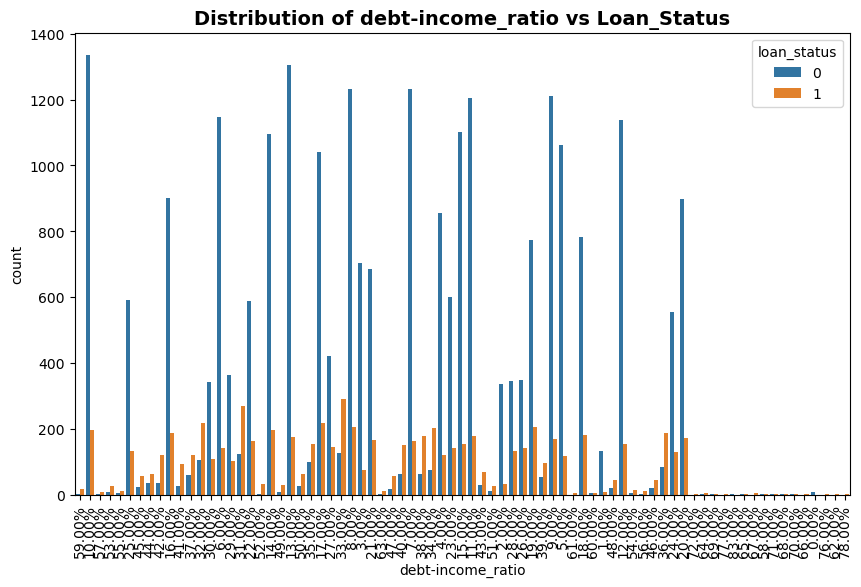

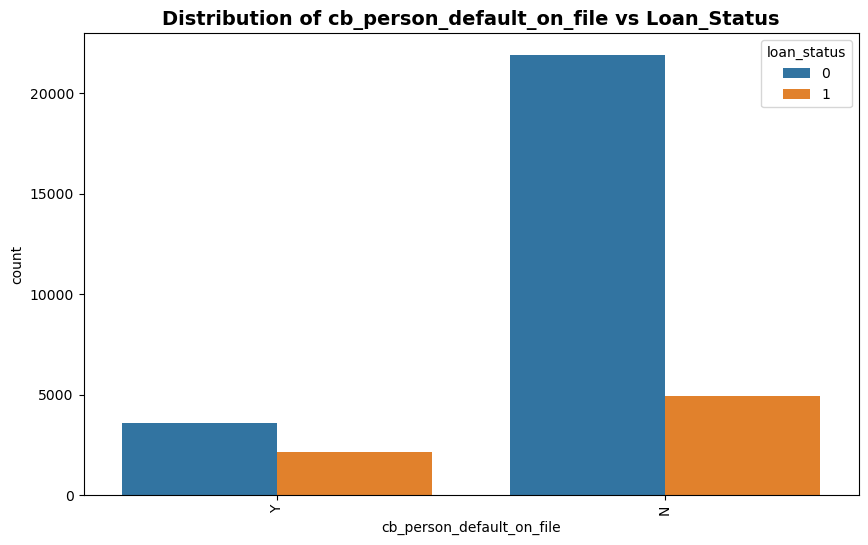

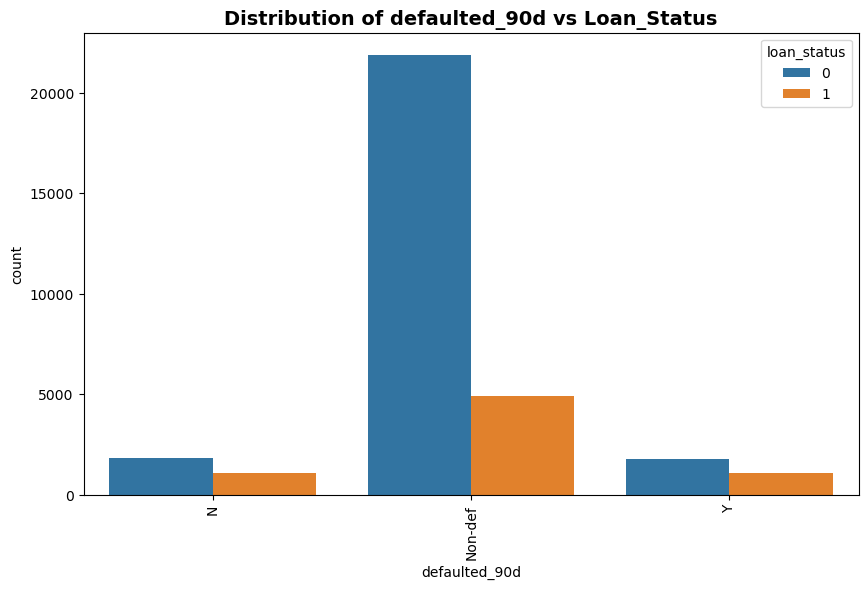

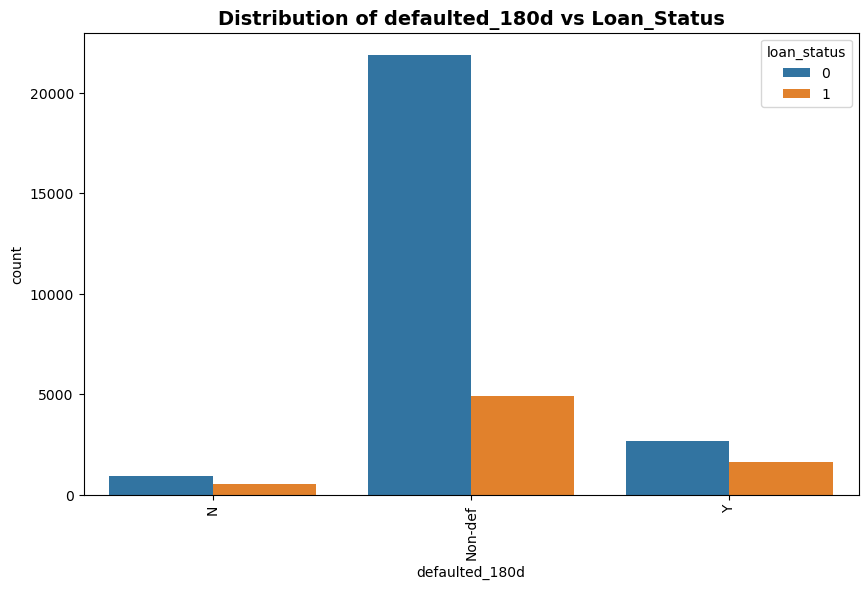

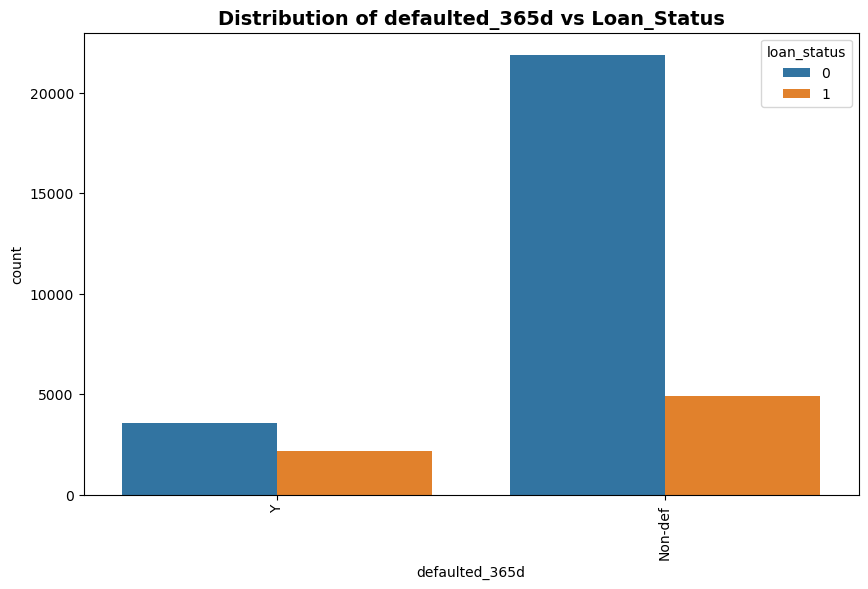

In [36]:
for col in cat_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(data=crd,x=col,hue='loan_status' )
  plt.title(f'Distribution of {col} vs Loan_Status', fontweight="bold", size=14)
  plt.xticks(rotation=90)
  plt.show()
  print("\n")

In [37]:
def plot_bar_single(column):
    target_column = crd[column].value_counts()
    plt.figure(figsize=(12, 8))
    target_column.plot(kind='bar', color=plt.cm.tab20(range(len(target_column))))
    plt.title(f"{column}_Value_Counts", fontweight="bold", size=14)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

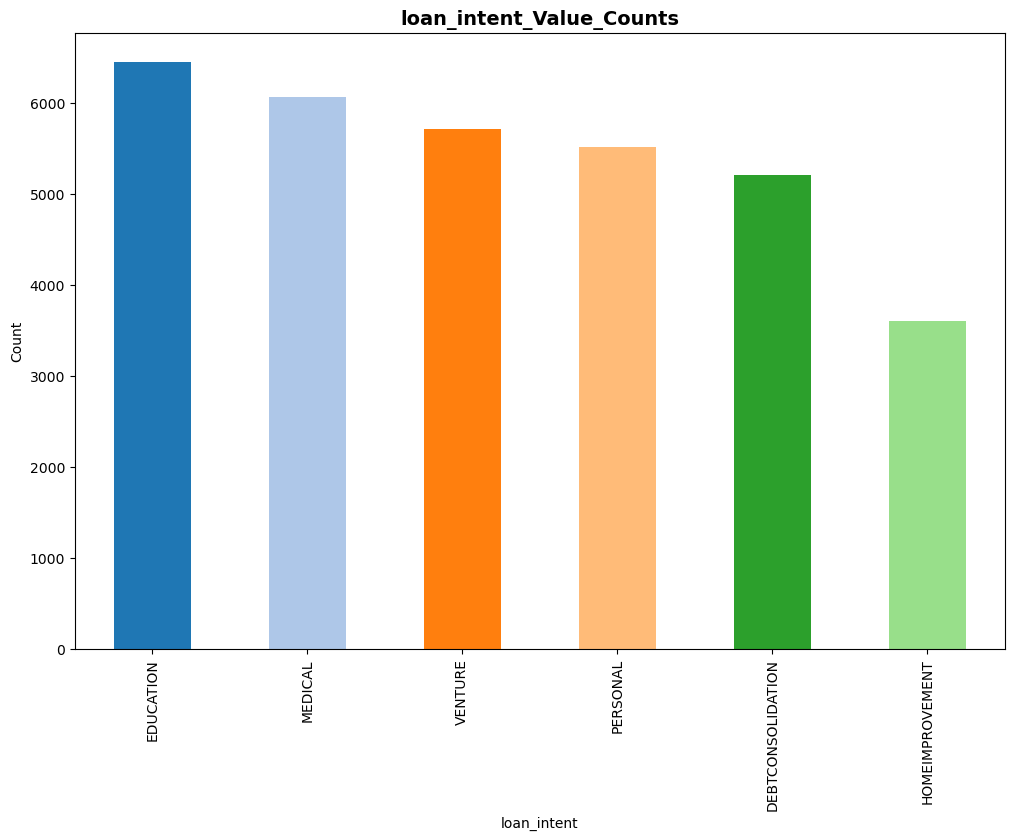

In [38]:
plot_bar_single('loan_intent')

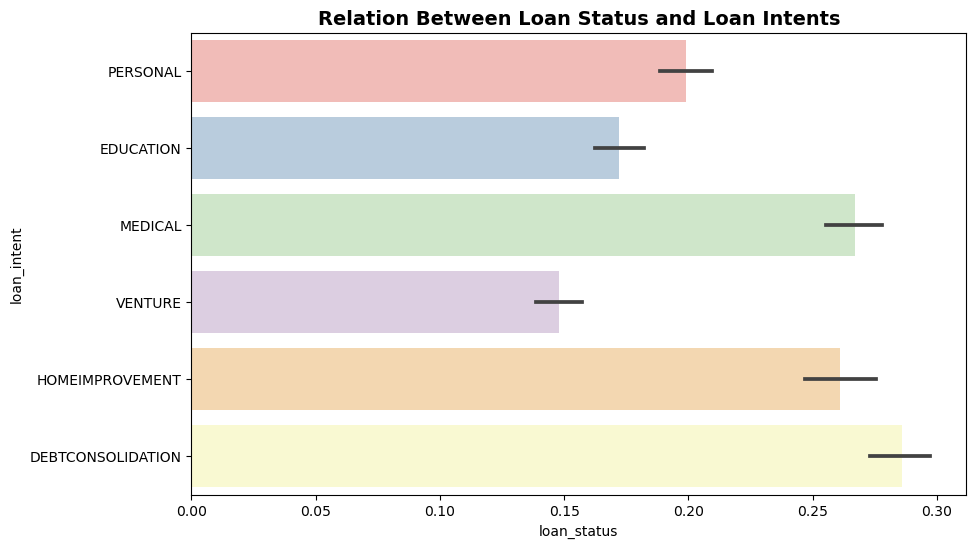

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x=crd["loan_status"], y=crd["loan_intent"], palette='Pastel1')
plt.title("Relation Between Loan Status and Loan Intents", fontweight="bold", size=14)
plt.show()

In [40]:
def plot_pie_single(column):
    target_column = crd[column].value_counts()
    plt.figure(figsize=(12, 8))
    fig1, ax1 = plt.subplots()
    ax1.pie(target_column, labels=target_column.index, autopct='%1.1f%%', shadow=None)
    ax1.axis('equal')
    plt.title(f"{column}_Value_Counts", fontweight="bold", size=14)
    plt.show()

<Figure size 1200x800 with 0 Axes>

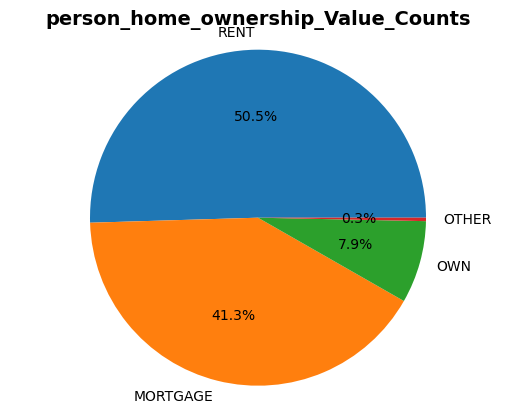

In [41]:
plot_pie_single('person_home_ownership')

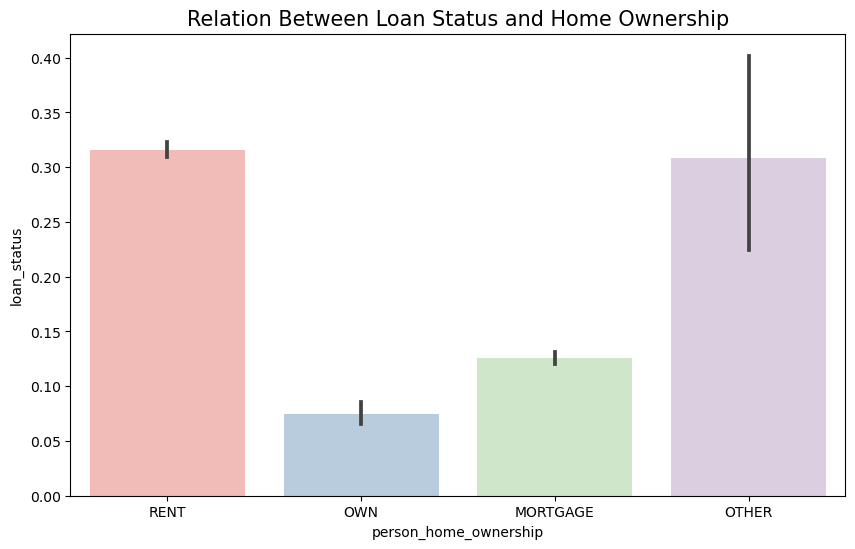

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=crd["person_home_ownership"], y=crd["loan_status"], palette='Pastel1')
plt.title("Relation Between Loan Status and Home Ownership", size=15)
plt.show()

In [43]:
max_age = crd['person_age'].max()
min_age = crd['person_age'].min()
print(f"maximum Age {max_age}")
print(f"minimum Age {min_age}")

maximum Age 144
minimum Age 20


In [44]:
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = crd['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')

age_group([0 ,18, 26, 36, 46, 56, 66])

Age between 1 and 18: Number of people 0
Age between 19 and 26: Number of people 17829
Age between 27 and 36: Number of people 11834
Age between 37 and 46: Number of people 2360
Age between 47 and 56: Number of people 434
Age between 57 and 66: Number of people 98


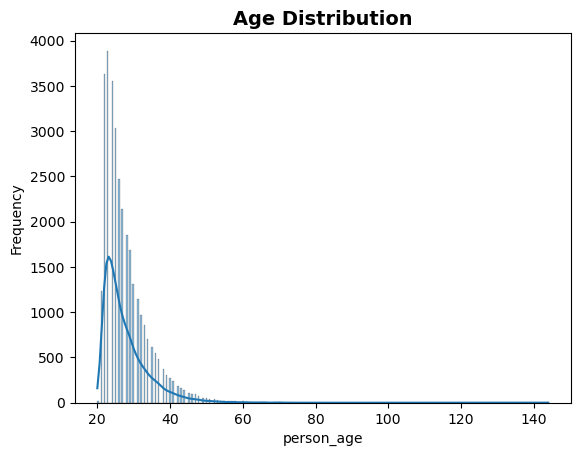

In [45]:
age_plot = pd.Series(crd.person_age, name="person_age")
plt.ylabel('Frequency')
sns.histplot(age_plot, kde=True)  
plt.title('Age Distribution', fontweight="bold", size=14)
plt.show()

In [46]:
max_income = crd['income'].max()
min_income = crd['income'].min()

print(f"maximum Income {max_income}")
print(f"minimum Income {min_income}")

maximum Income 6000000
minimum Income 4000


In [47]:
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = crd['income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people are {num_people}')
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])

Income between 1 and 25000: Number of people are 2469
Income between 25001 and 50000: Number of people are 11613
Income between 50001 and 75000: Number of people are 9622
Income between 75001 and 100000: Number of people are 4670
Income between 100001 and inf: Number of people are 4207


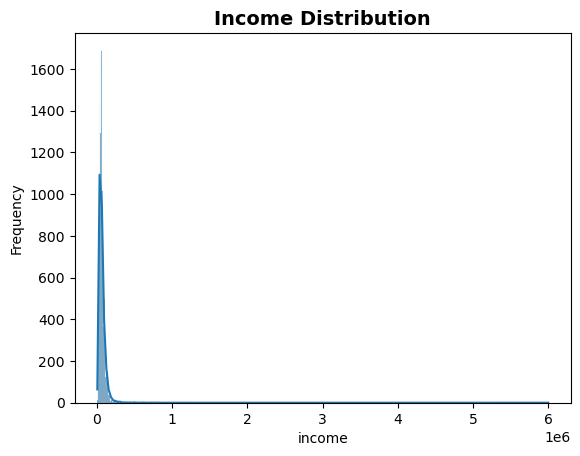

In [48]:
income_plot = pd.Series(crd.income, name="income")
plt.ylabel('Frequency')
sns.histplot(income_plot, kde=True)  
plt.title('Income Distribution', fontweight="bold", size=14)
plt.show()

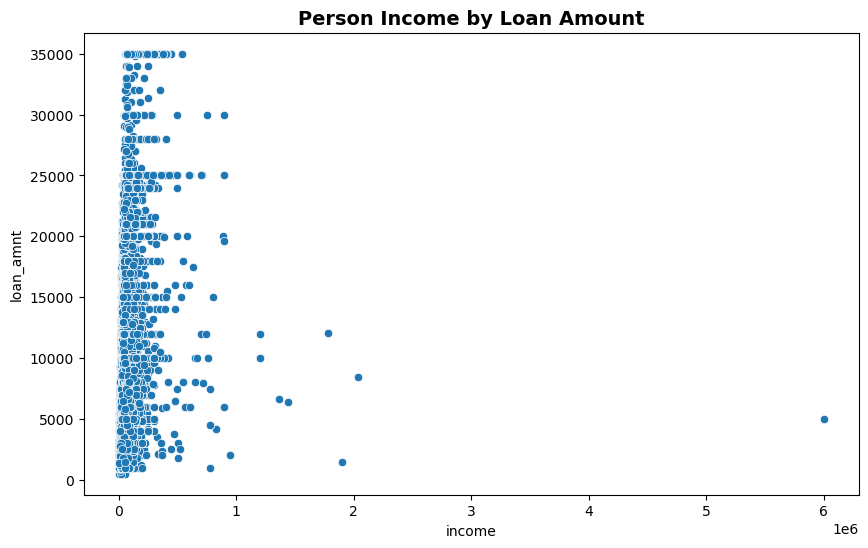

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="income", y="loan_amnt", data=crd)
plt.title("Person Income by Loan Amount", fontweight="bold", size=14)
plt.show()

In [50]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [51]:
X=crd.drop('loan_status',axis=1)
y=crd['loan_status']

In [52]:
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
le = LabelEncoder()
for col in categorical_features:
    X[col] = le.fit_transform(X[col])

In [68]:
sbs = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=5)

In [71]:
sbs.fit(X, y)

C:\Users\megha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\megha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\megha\anaconda3\Lib\site-packages

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=5)

In [72]:
selected_features = X.columns[sbs.get_support()]

In [73]:
X_selected = X[selected_features]

In [74]:
X_selected

,gender,no.of_dependents,person_home_ownership,loan_grade,no.of _credit _cards
0,1,4,3,3,2
1,1,6,2,1,2
2,1,3,0,2,3
3,1,5,3,2,2
4,1,0,3,2,3
...,...,...,...,...,...
32576,0,6,0,2,2
32577,1,5,0,0,3
32578,1,0,3,1,0
32579,0,0,0,1,2


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [76]:
model=LogisticRegression()

In [77]:
model.fit(X_train, y_train)

LogisticRegression()

In [78]:
y_pred = model.predict(X_test)

In [79]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
accuracy = accuracy_score(y_test, y_pred)

In [81]:
accuracy

0.8267607794997698

In [82]:
confusion_mat = confusion_matrix(y_test, y_pred)

In [83]:
confusion_mat

array([[4918,  154],
       [ 975,  470]], dtype=int64)

Key Metrics and Inferences
True Negatives (4918): The model correctly identified 4918 cases where the customer would not default.
False Positives (154): There are 154 cases where the model incorrectly predicted a default when the customer actually would not.
False Negatives (975): The model missed 975 cases of actual defaults, predicting them as non-defaults. This could impact the lender's risk exposure.
True Positives (470): The model accurately identified 470 actual defaults.
Additional Insights
Precision (for "Default" class): Measures the model's accuracy when predicting defaults, calculated as 470 / (470 + 154) ≈ 0.75 (75%).
Recall (for "Default" class): Indicates the model's ability to detect actual defaults, calculated as 470 / (470 + 975) ≈ 0.33 (33%).
Conclusion
The model has a high accuracy, correctly classifying most cases overall.
Precision for defaults is reasonable, suggesting the model is effective in identifying true defaults when it predicts a default.
However, recall for the default class is low, indicating that the model may struggle to detect all default cases.

In [86]:
classification_rep = classification_report(y_test, y_pred)

In [87]:
classification_rep

'              precision    recall  f1-score   support\n\n           0       0.83      0.97      0.90      5072\n           1       0.75      0.33      0.45      1445\n\n    accuracy                           0.83      6517\n   macro avg       0.79      0.65      0.68      6517\nweighted avg       0.82      0.83      0.80      6517\n'

In [88]:
print("Selected features:", selected_features)

Selected features: Index(['gender', 'no.of_dependents', 'person_home_ownership', 'loan_grade',
       'no.of _credit _cards'],
      dtype='object')


In [89]:
print("Accuracy:", accuracy)

Accuracy: 0.8267607794997698


In [90]:
print("Confusion Matrix:\n", confusion_mat)

Confusion Matrix:
 [[4918  154]
 [ 975  470]]


In [91]:
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      5072
           1       0.75      0.33      0.45      1445

    accuracy                           0.83      6517
   macro avg       0.79      0.65      0.68      6517
weighted avg       0.82      0.83      0.80      6517

